In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path

import scipy.stats
import scipy.stats as stats

In [2]:
#CSV File to Load

train_data = Path("Resources/train.csv")

#Read the CSV File
train = pd.read_csv(train_data,delimiter = ";")

#Display the data
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Clean the Data by Making a New Dataframe with columns Age, Job, Marital, Education , Housing, Loan, Balance & last columns (Y)

train_df = train.loc[:,["age","job","marital","education","housing","loan","balance","y"]]
train_df.head()

#Drop the column name Default, Contact, Campaign,pdays, Previous,poutcome

,age,job,marital,education,housing,loan,balance,y
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


## Data Cleaning

In [4]:
#Rename the columns name 

train_data_df = train_df.rename(columns={"age":"Age","job":"Job","marital":"Marital_Status","education":"Education",
                                         "housing":"Housing","loan":"Loan","balance":"Balance","y":"Outcome"})

train_data_df.head()

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [5]:
#checking for missing Data
train_data_df.count()

Age               45211
Job               45211
Marital_Status    45211
Education         45211
Housing           45211
Loan              45211
Balance           45211
Outcome           45211
dtype: int64

In [6]:
print( train_data_df['Outcome'].value_counts()['yes'] )
print( train_data_df['Outcome'].value_counts()['no'] )

5289
39922


In [7]:
#Cleaning the data by removing unknown category from Job and Education column
train_data_clean=train_data_df[train_data_df['Job']!='unknown'].loc[train_data_df['Education']!='unknown']
train_data_clean.reset_index()

,index,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,0,58,management,married,tertiary,yes,no,2143,no
1,1,44,technician,single,secondary,yes,no,29,no
2,2,33,entrepreneur,married,secondary,yes,yes,2,no
3,5,35,management,married,tertiary,yes,no,231,no
4,6,28,management,single,tertiary,yes,yes,447,no
...,...,...,...,...,...,...,...,...,...
43188,45206,51,technician,married,tertiary,no,no,825,yes
43189,45207,71,retired,divorced,primary,no,no,1729,yes
43190,45208,72,retired,married,secondary,no,no,5715,yes
43191,45209,57,blue-collar,married,secondary,no,no,668,no


In [8]:
#Checking for the age range of the participant 
min_age=train_data_clean['Age'].min()
max_age=train_data_clean['Age'].max()

print(f'The participant age ranges from {min_age}years to {max_age}years')

The participant age ranges from 18years to 95years


In [9]:
#adding age range to the Dataframe
size_bin=[0,18,35,60,100]
labels=['Teenager','Youth','Adult','Old Adult']

#categorize the age based on the bin
train_data_clean['Age Category']=pd.cut(train_data_clean['Age'],size_bin,labels=labels)
train_data_clean

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category
0,58,management,married,tertiary,yes,no,2143,no,Adult
1,44,technician,single,secondary,yes,no,29,no,Adult
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth
5,35,management,married,tertiary,yes,no,231,no,Youth
6,28,management,single,tertiary,yes,yes,447,no,Youth
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,825,yes,Adult
45207,71,retired,divorced,primary,no,no,1729,yes,Old Adult
45208,72,retired,married,secondary,no,no,5715,yes,Old Adult
45209,57,blue-collar,married,secondary,no,no,668,no,Adult


In [10]:
#adding Balance range to the Dataframe
size_bin=[-9000,0,500,2000,10000,100000,105000]
labels=["Negative balance",'<\$500',"\$500-$2000",'\$2000-$10000','\$10000-$100000','\$100000+']

#categorize the age based on the bin
train_data_clean['Balance Category']=pd.cut(train_data_clean['Balance'],size_bin,labels=labels)
train_data_clean

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category,Balance Category
0,58,management,married,tertiary,yes,no,2143,no,Adult,\$2000-$10000
1,44,technician,single,secondary,yes,no,29,no,Adult,<\$500
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth,<\$500
5,35,management,married,tertiary,yes,no,231,no,Youth,<\$500
6,28,management,single,tertiary,yes,yes,447,no,Youth,<\$500
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,825,yes,Adult,\$500-$2000
45207,71,retired,divorced,primary,no,no,1729,yes,Old Adult,\$500-$2000
45208,72,retired,married,secondary,no,no,5715,yes,Old Adult,\$2000-$10000
45209,57,blue-collar,married,secondary,no,no,668,no,Adult,\$500-$2000


In [11]:
#get how many participant belongs to each job category
job_category=train_data_clean['Job'].value_counts()

#get how many participant belongs to each Education category
education_category=train_data_clean['Education'].value_counts()

print(education_category)
job_category

secondary    23131
tertiary     13262
primary       6800
Name: Education, dtype: int64


blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: Job, dtype: int64

In [12]:
#calculate the outcome based on Age category and the type of Job.
job_age_category_outcome=train_data_clean.groupby('Outcome')[['Age Category','Job']]
job_age_category_outcome.value_counts()

Outcome  Age Category  Job          
no       Adult         blue-collar      5449
                       management       4876
                       technician       3727
         Youth         blue-collar      3136
                       management       3032
                                        ... 
yes      Teenager      management          0
                       retired             0
                       self-employed       0
                       services            0
                       admin.              0
Length: 88, dtype: int64

In [13]:
#grouping our Data based on the outcome
#Sccessful outcom
train_data_df_success=train_data_clean[train_data_clean['Outcome']=='yes']

#failed outcome
train_data_df_failed=train_data_clean[train_data_clean['Outcome']=='no']

In [14]:
#showing the outcome based on Education level
edu_level_success_outcome=train_data_df_success['Education'].value_counts()
edu_level_failed_outcome=train_data_df_failed['Education'].value_counts()

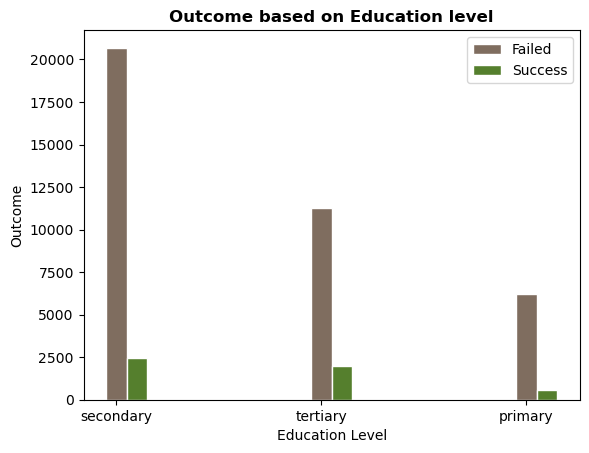

In [24]:
# Generate a bar plot showing the outcome based on Education level
label=edu_level_success_outcome.index.tolist()
x_axis=np.arange(len(label))

# set width of bars
barWidth = 0.1

# Create a bar chart based upon the above data
plt.bar(x_axis,edu_level_failed_outcome, color='#7F6D5F', width=barWidth, edgecolor='white', label='Failed')
plt.bar([x + barWidth for x in x_axis],edu_level_success_outcome,   color='#557F2D', width=barWidth, edgecolor='white', label='Success')

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, label)

# Give the chart a title, x label, and y label
plt.title('Outcome based on Education level', fontweight = 'bold')
plt.xlabel('Education Level')
plt.ylabel('Outcome')

# Save the Figure
plt.savefig("Images/Outcomr_based_on_Education")

# Create legend & Show graphic
plt.legend()
plt.show()

## Analysis:
The chart shows that Education level does not have substantial effect on the term deposit purchase
as the ratio of success to failure across all categories are almost the same.

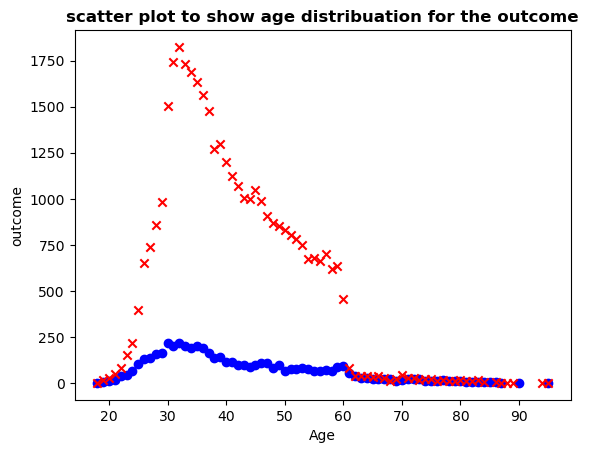

In [51]:
# A scatter plot to show age disribution for the outcome
age_chart_df_success=train_data_df_success['Age'].value_counts()
age_chart_df_failed=train_data_df_failed['Age'].value_counts()

plt.scatter(age_chart_df_success.keys(),age_chart_df_success, c='b',marker="o")
plt.scatter(age_chart_df_failed.keys(),age_chart_df_failed, c='r',marker="x")
plt.title('scatter plot to show age distribuation for the outcome', fontweight='bold')
plt.ylabel('outcome')
plt.xlabel('Age')

# Save the Figure
plt.savefig("Images/ScatterPlot_Agedistribuation_forOutcome")

plt.show()

## Analysis:
The chart shows that more people with low balance purchase the term deposit but at the same time more failure was recorded 
for them, therefore it can be concluded that the balance does not determined the outcome.

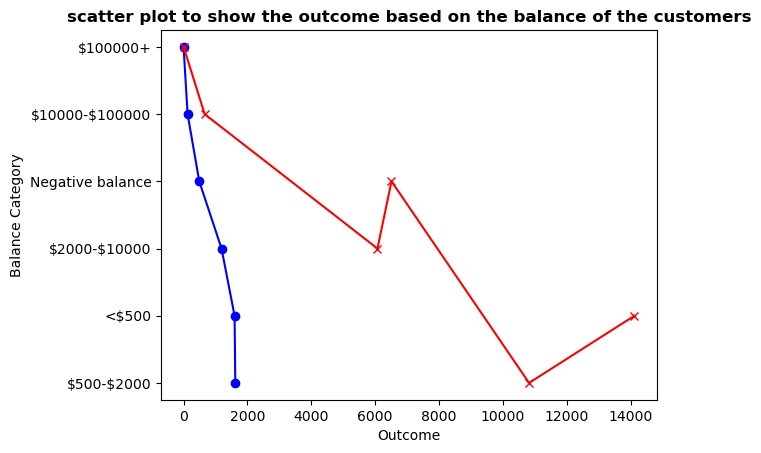

In [52]:
# A scatter plot to show the outcome based on the balance of the customers
balance_chart_df_success=train_data_df_success['Balance Category'].value_counts()
balance_chart_df_failed=train_data_df_failed['Balance Category'].value_counts()

plt.plot(balance_chart_df_success,balance_chart_df_success.keys(), c='b', marker='o')
plt.plot(balance_chart_df_failed,balance_chart_df_failed.keys(), c='r',marker="x")
plt.title('scatter plot to show the outcome based on the balance of the customers', fontweight='bold')
plt.ylabel('Balance Category' )
plt.xlabel('Outcome')

# Save the Figure
plt.savefig("Images/ScatterPlot_Outcomebased_YearlyBalance")

plt.show()

## Analysis:
This chart shows the relationship between age and the outcome, it can also be concluded that there is no relationship between 
both except among the participant between the age of 60 to 90+ which shows a 50:50 ratio of success to failure.

The correlation between Age and Balance for the successful outcome is 0.12


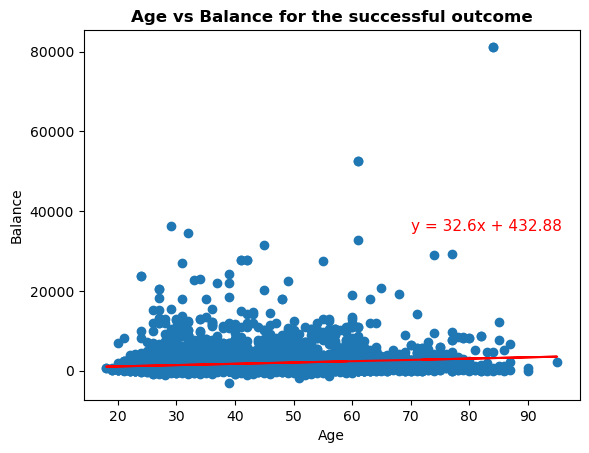

In [53]:
# Showing the correlation coefficient and a linear regression model 
# for Age and Balance for the successful outcome
x_values = train_data_df_success['Age']
y_values = train_data_df_success['Balance']


# Calculate the correlation
correlation = round(st.pearsonr(x_values,y_values)[0],2)

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')

# Plot the Annotation in the graph 
plt.annotate(line_eq,(70,35000),fontsize=11,color="red")

# Define title and x/y labels
plt.title('Age vs Balance for the successful outcome', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Balance')

# Save the Figure
plt.savefig("Images/Age_vs_Balance")

print(f'The correlation between Age and Balance for the successful outcome is {correlation}')
plt.show()

## Analysis:
The chart shows the correlation between age and balance of participants that purchase the term deposit. 
It can be established that there is little or no correlation between the two factors.

# Housing_Loan Analysis
This analyzes the data from the customers having a housing loan

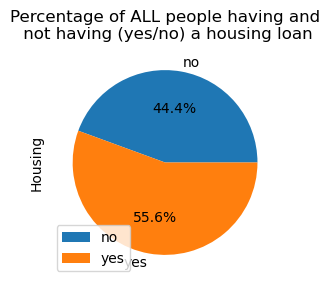

In [32]:
# This shows OVERALL the percentage of people having and not having a housing loan

#Grouping and graphing
pie_mode_housing_all = train_data_df.groupby(['Housing'])['Housing'].count()
pie_mode_housing_all.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ALL people having and\n not having (yes/no) a housing loan')

# Save the Figure
plt.legend(loc = "lower left")
plt.savefig("Images/Hosuing_Loan")

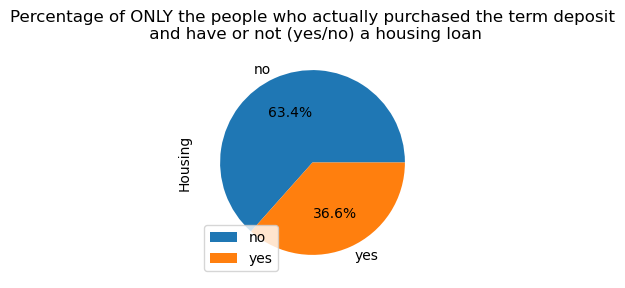

In [33]:
# This filters the records having bought a term deposit (outcome equal to yes) 
# and graphs the mode of the number of customers having a house loan or not

#Filtering the data
train_data_df_filtered = train_data_df[train_data_df['Outcome'] =='yes'] 

#Grouping and graphing
pie_mode_housing = train_data_df_filtered.groupby(['Housing'])['Housing'].count()
pie_mode_housing.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who actually purchased the term deposit\n and have or not (yes/no) a housing loan')

# Save the Figure
plt.legend(loc = "lower left")
plt.savefig("Images/Hosuing_loan_1")

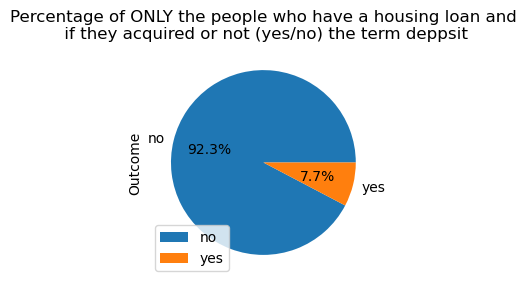

In [34]:
# This filters the records having a housing loan 
# and graphs the mode of the number of customers having bought the product

#Filtering the data
train_data_df_filtered = train_data_df[train_data_df['Housing'] =='yes'] 

#Grouping and graphing
pie_mode_housing = train_data_df_filtered.groupby(['Outcome'])['Outcome'].count()
pie_mode_housing.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who have a housing loan and\n if they acquired or not (yes/no) the term deppsit')

# Save the Figure
plt.legend(loc = "lower left")
plt.savefig("Images/Housing_loan_2")

The correlation between customers purchasing a term deposit and if they have a house loan is PearsonRResult(statistic=-0.13917270249816988, pvalue=2.6219265719354726e-194)
The model details are LinregressResult(slope=-0.09002395253461448, intercept=0.16702355460385443, rvalue=-0.1391727024981698, pvalue=2.6219265718490925e-194, stderr=0.0030126200760099073, intercept_stderr=0.0022460455194902554)


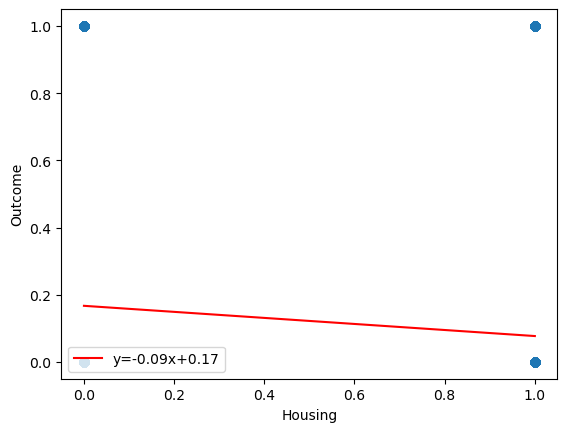

In [35]:
# This calculates the correlation between customers having a house loan and purchased the product

# Updates the values of the dataset from "yes" to 1 and from "no" to 0
train_data_df_updated = train_data_df.replace('yes',1)
train_data_df_updated2 = train_data_df_updated.replace('no',0)
train_data_df_updated2
# Calculates pearsonr and model data
corr=st.pearsonr(train_data_df_updated2['Housing'],train_data_df_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and if they have a house loan is {corr}")
model=st.linregress(train_data_df_updated2['Housing'],train_data_df_updated2['Outcome'])
print(f"The model details are {model}")
# Taking the values from above output
slope = -0.090
intercept = 0.167
line = slope*(train_data_df_updated2['Housing'])+intercept
# Creates the graph
plt.scatter(train_data_df_updated2['Housing'],train_data_df_updated2['Outcome'])
plt.plot(train_data_df_updated2['Housing'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Housing')
plt.ylabel('Outcome')

# Save the Figure
plt.savefig("Images/Correlation_Houseing_loan")

plt.legend(loc = "lower left")
plt.show()

## Conclusion of Housing_Loan Analysis
The initial graph shows no evident relationship between having a housing loan and whether or not influences the decision of purchasing the product.
The second graph shows evidence that majority of the persons who bought the product did not have a housing loan.
However, after calculating their correlationship, there is no clear relationships between having or not a housing loan and purchasing a term deposit. 

# Personal_Loan Analysis
This analyzes the data from the customers having a personal loan

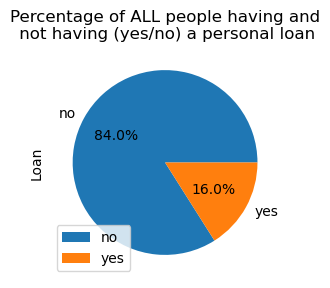

In [36]:
# This shows OVERALL the percentage of people having and not having a personal loan

#Grouping and graphing
pie_mode_housing_all = train_data_df.groupby(['Loan'])['Loan'].count()
pie_mode_housing_all.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ALL people having and\n not having (yes/no) a personal loan')

# Save the Figure
plt.legend(loc = "lower left")
plt.savefig("Images/Personal_Loan")

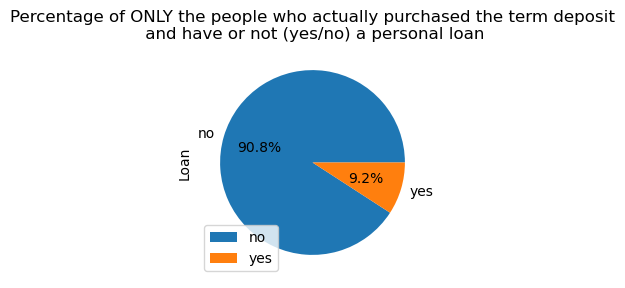

In [37]:
# This filters the records having bought a term deposit (outcome equal to yes) 
# and graphs the mode of the number of customers having a personal loan or not

train_data_df_filtered = train_data_df[train_data_df['Outcome'] =='yes'] 
pie_mode_loan = train_data_df_filtered.groupby(['Loan'])['Loan'].count()
pie_mode_loan.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who actually purchased the term deposit\n and have or not (yes/no) a personal loan')

# Save the Figure
plt.legend(loc = "lower left")
plt.savefig("Images/Personal_Loan_1")

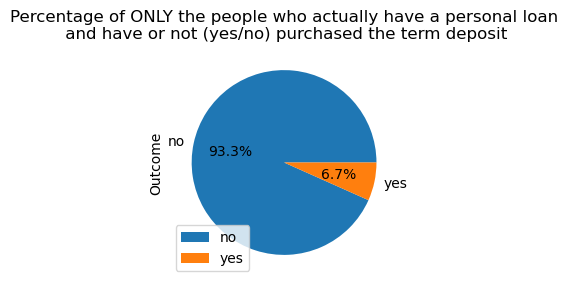

In [38]:
# This filters the records having a personal loan 
# and graphs the mode of the number of customers having bought the product

#Filtering the data
train_data_df_filtered = train_data_df[train_data_df['Loan'] =='yes'] 

#Grouping and graphing
pie_mode_loan = train_data_df_filtered.groupby(['Outcome'])['Outcome'].count()
pie_mode_loan.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who actually have a personal loan\n and have or not (yes/no) purchased the term deposit')

# Save the Figure
plt.legend(loc = "lower left")
plt.savefig("Images/Personal_Loan_2")


The correlation between customers purchasing a term deposit and if they have a personal loan is PearsonRResult(statistic=-0.06818503472421267, pvalue=9.793657535666939e-48)
The model details are LinregressResult(slope=-0.0597433584575476, intercept=0.12655727342165568, rvalue=-0.06818503472421271, pvalue=9.793657535355451e-48, stderr=0.0041112719147707, intercept_stderr=0.0016456723250011381)


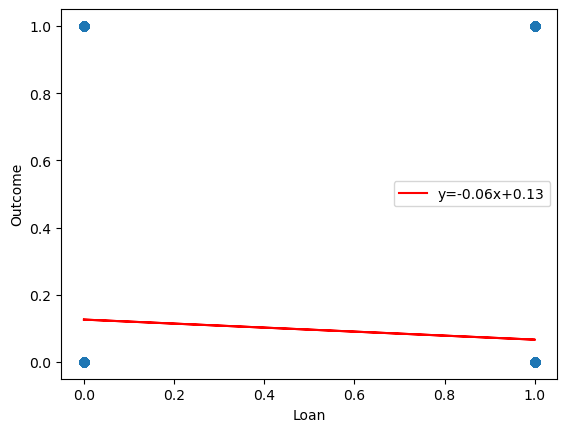

In [39]:
# This calculates the correlation between customers having a house loan and purchased the product

# Updates the values of the dataset from "yes" to 1 and from "no" to 0
train_data_df_updated = train_data_df.replace('yes',1)
train_data_df_updated2 = train_data_df_updated.replace('no',0)
train_data_df_updated2

# Calculates pearsonr and model data
corr=st.pearsonr(train_data_df_updated2['Loan'],train_data_df_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and if they have a personal loan is {corr}")
model=st.linregress(train_data_df_updated2['Loan'],train_data_df_updated2['Outcome'])
print(f"The model details are {model}")

# Taking the values from above output
slope = -0.0597
intercept = 0.126
line = slope*(train_data_df_updated2['Loan'])+intercept

# Creates the graph
plt.scatter(train_data_df_updated2['Loan'],train_data_df_updated2['Outcome'])
plt.plot(train_data_df_updated2['Loan'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Loan')
plt.ylabel('Outcome')

# Save the Figure
plt.savefig("Images/Correlation_Personal_Loan")

plt.legend()
plt.show()

## Conclusion of Personal_Loan analysis
The initial graph shows evident relationship between having a personal loan and whether or not influences the decision of purchasing the product. 
As shown in the second graph as well, majority of the persons who bought the product did not have a personal loan.
After calculating their correlationship, there is no clear relationships between having or not a personal loan and purchasing a term deposit. 

In [41]:
# selecting only the data frame with outcome 'yes'
outcome_yes= train_data_df[train_data_df["Outcome"].isin(['yes'])]

outcome_yes.head()


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
83,59,admin.,married,secondary,yes,no,2343,yes
86,56,admin.,married,secondary,no,no,45,yes
87,41,technician,married,secondary,yes,no,1270,yes
129,55,services,married,secondary,yes,no,2476,yes
168,54,admin.,married,tertiary,no,no,184,yes


In [42]:
outcome_yes.count()

Age               5289
Job               5289
Marital_Status    5289
Education         5289
Housing           5289
Loan              5289
Balance           5289
Outcome           5289
dtype: int64

In [43]:
# description of the dataframe

outcome_yes.describe()

,Age,Balance
count,5289.000000,5289.000000
mean,41.670070,1804.267915
std,13.497781,3501.104777
min,18.000000,-3058.000000
25%,31.000000,210.000000
50%,38.000000,733.000000
75%,50.000000,2159.000000
max,95.000000,81204.000000


In [44]:
#Selecting the Dataframe with Outcome No

outcome_no = train_data_clean[train_data_clean["Outcome"].isin(['no'])]
outcome_no

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category,Balance Category
0,58,management,married,tertiary,yes,no,2143,no,Adult,\$2000-$10000
1,44,technician,single,secondary,yes,no,29,no,Adult,<\$500
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth,<\$500
5,35,management,married,tertiary,yes,no,231,no,Youth,<\$500
6,28,management,single,tertiary,yes,yes,447,no,Youth,<\$500
...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,yes,yes,138,no,Adult,<\$500
45198,37,management,married,tertiary,no,no,1428,no,Adult,\$500-$2000
45199,34,blue-collar,single,secondary,yes,no,1475,no,Youth,\$500-$2000
45209,57,blue-collar,married,secondary,no,no,668,no,Adult,\$500-$2000


In [45]:
# Get the dtype of DataFrame

outcome_no.dtypes

Age                    int64
Job                   object
Marital_Status        object
Education             object
Housing               object
Loan                  object
Balance                int64
Outcome               object
Age Category        category
Balance Category    category
dtype: object

In [46]:
# Description of the dataframe

outcome_no.describe()

,Age,Balance
count,38172.000000,38172.000000
mean,40.669679,1297.333176
std,10.083233,2974.636443
min,18.000000,-8019.000000
25%,33.000000,57.000000
50%,39.000000,413.000000
75%,48.000000,1339.000000
max,95.000000,102127.000000


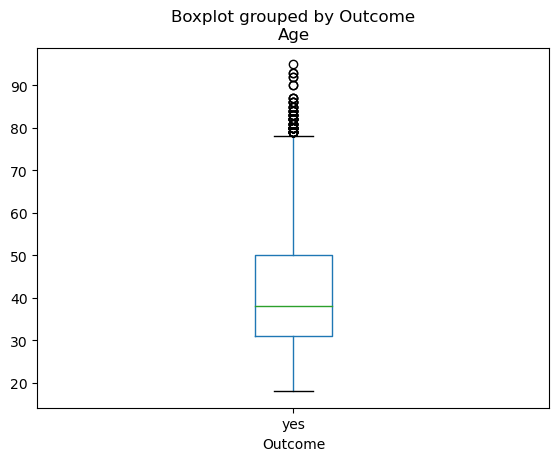

In [48]:
#generate a box plot based on age

outcome_yes.boxplot(by = 'Outcome', column=['Age'], grid = False)

# Save the Figure
plt.savefig("Images/Boxplot_outcome_Yes")

plt.show()


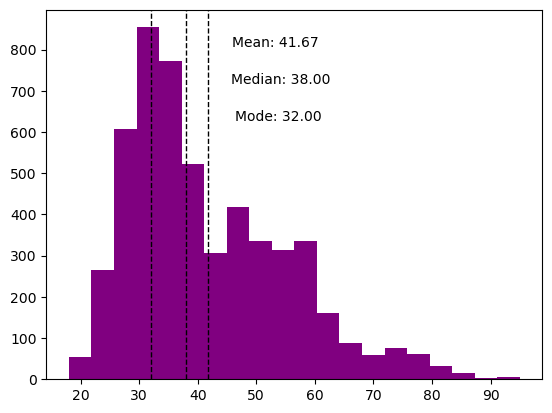

In [50]:
#Genrate Histogram for Age with outcome Yes

plt.hist(outcome_yes['Age'], bins=20,color='purple')
plt.axvline(outcome_yes['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_yes['Age'].median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_yes['Age'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(outcome_yes['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_yes['Age'].mean()))
plt.text(outcome_yes['Age'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(outcome_yes['Age'].median()))
plt.text(outcome_yes['Age'].mode().values[0]*1.45, max_ylim*0.7, 'Mode: {:.2f}'.format(outcome_yes['Age'].mode().values[0]))

# Save the Figure

plt.savefig("Images/Histogram_outcome_Yes")


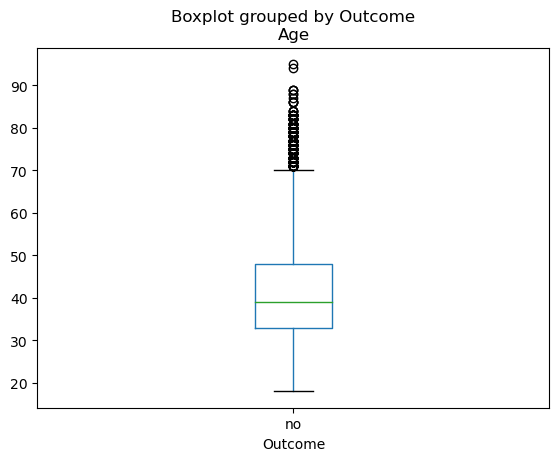

In [34]:
# Generate a Box Plot for Age

outcome_no.boxplot(by = 'Outcome', column=['Age'], grid = False)

# Save the Figure
plt.savefig("Images/Boxplot_outcome_No")

plt.show()

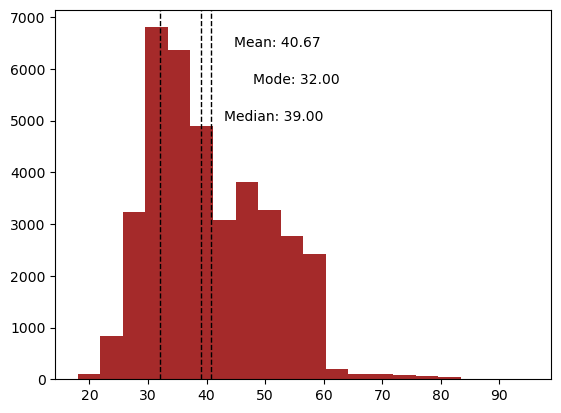

In [35]:
#Genrate Histogram for Age with outcome No

plt.hist(outcome_no['Age'], bins=20,color='brown')
plt.axvline(outcome_no['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Age'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Age'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(outcome_no['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_no['Age'].mean()))
plt.text(outcome_no['Age'].mode()*1.5, max_ylim*0.8, 'Mode: {:.2f}'.format(outcome_no['Age'].mode().values[0]))
plt.text(outcome_no['Age'].median()*1.1, max_ylim*0.7, 'Median: {:.2f}'.format(outcome_no['Age'].median()))

# Save the Figure
plt.savefig("Images/Histogram_outcome_No")


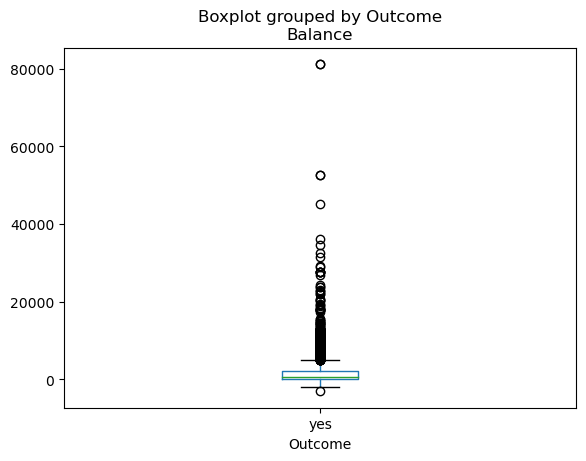

In [36]:
#generate a box plot based on Balance
outcome_yes.boxplot(by = 'Outcome', column=['Balance'], grid = False)

# Save the Figure
plt.savefig("Images/YearlyBalance_Boxplot_outcomeyes")


plt.show()

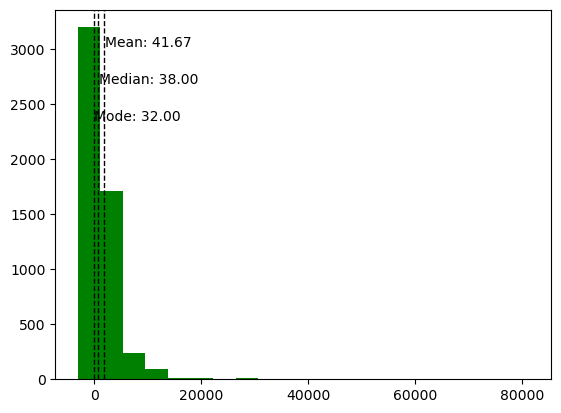

In [37]:
# outcome_yes['Balance'].plot(kind='box', title='Balance available with people saying yes')
# plt.show()

plt.hist(outcome_yes['Balance'], bins=20,color='green')
plt.axvline(outcome_yes['Balance'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_yes['Balance'].median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_yes['Balance'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(outcome_yes['Balance'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_yes['Age'].mean()))
plt.text(outcome_yes['Balance'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(outcome_yes['Age'].median()))
plt.text(outcome_yes['Balance'].mode().values[0]*1.45, max_ylim*0.7, 'Mode: {:.2f}'.format(outcome_yes['Age'].mode().values[0]))

# Save the Figure
plt.savefig("Images/YearlyBalance_Histogram_outcomeyes")

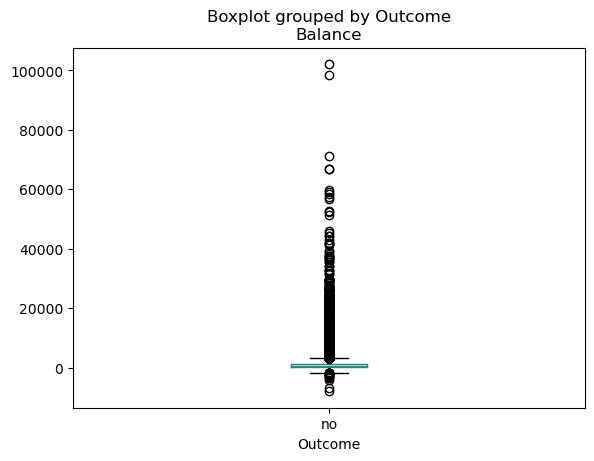

In [38]:
# Generate a Box Plot for Yearly_Balance

outcome_no.boxplot(by = 'Outcome', column=['Balance'], grid = False)

# Save the Figure
plt.savefig("Images/YearlyBalance_Boxplot_outcomeno")

plt.show()

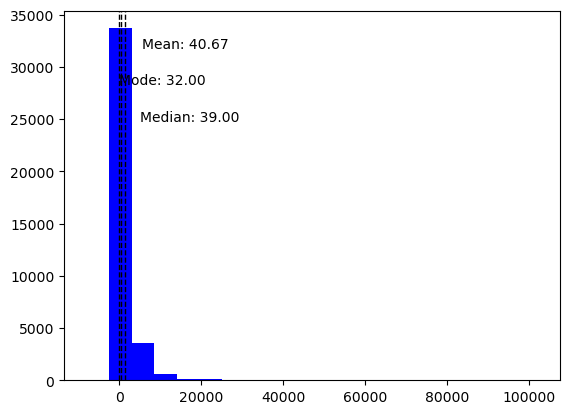

In [39]:
#Genrate Histogram for Yearly_Balance 

plt.hist(outcome_no['Balance'], bins=20,color='blue')
plt.axvline(outcome_no['Balance'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Balance'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Balance'].median(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()

plt.text(outcome_no['Balance'].mean()*4.3, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_no['Age'].mean()))
plt.text(outcome_no['Balance'].mode()*4.9, max_ylim*0.8, 'Mode: {:.2f}'.format(outcome_no['Age'].mode().values[0]))
plt.text(outcome_no['Balance'].median()*12.3, max_ylim*0.7, 'Median: {:.2f}'.format(outcome_no['Age'].median()))

# Save the Figure
plt.savefig("Images/YearlyBalance_Histogram_outcomeno")

In [40]:
# remove_outlier(outcome_yes_in, Age):

q1 = outcome_yes['Age'].quantile(0.25)
q3 = outcome_yes['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = outcome_yes.loc[(outcome_yes['Age'] > fence_low) & (outcome_yes['Age'] < fence_high)]
print (iqr)
df_out


19.0


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
83,59,admin.,married,secondary,yes,no,2343,yes
86,56,admin.,married,secondary,no,no,45,yes
87,41,technician,married,secondary,yes,no,1270,yes
129,55,services,married,secondary,yes,no,2476,yes
168,54,admin.,married,tertiary,no,no,184,yes
...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,no,2850,yes
45205,25,technician,single,secondary,no,yes,505,yes
45206,51,technician,married,tertiary,no,no,825,yes
45207,71,retired,divorced,primary,no,no,1729,yes


In [41]:
# remove_outlier(outcome_no_in, Age):

q1 = outcome_no['Age'].quantile(0.25)
q3 = outcome_no['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_outcome = outcome_no.loc[(outcome_no['Age'] > fence_low) & (outcome_no['Age'] < fence_high)]
print (iqr)
df_outcome


15.0


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category,Balance Category
0,58,management,married,tertiary,yes,no,2143,no,Adult,\$2000-$10000
1,44,technician,single,secondary,yes,no,29,no,Adult,<\$500
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth,<\$500
5,35,management,married,tertiary,yes,no,231,no,Youth,<\$500
6,28,management,single,tertiary,yes,yes,447,no,Youth,<\$500
...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,yes,yes,138,no,Adult,<\$500
45198,37,management,married,tertiary,no,no,1428,no,Adult,\$500-$2000
45199,34,blue-collar,single,secondary,yes,no,1475,no,Youth,\$500-$2000
45209,57,blue-collar,married,secondary,no,no,668,no,Adult,\$500-$2000


In [42]:
df_outcome.count()

Age                 37934
Job                 37934
Marital_Status      37934
Education           37934
Housing             37934
Loan                37934
Balance             37934
Outcome             37934
Age Category        37934
Balance Category    37934
dtype: int64

The correlation between customers purchasing a term deposit and Age is PearsonRResult(statistic=0.025155017088380905, pvalue=8.825643692203388e-08)
The model details are LinregressResult(slope=0.000761385052706944, intercept=0.08581658601129653, rvalue=0.025155017088380752, pvalue=8.825643691923094e-08, stderr=0.0001423081689574494, intercept_stderr=0.00601835517541513)


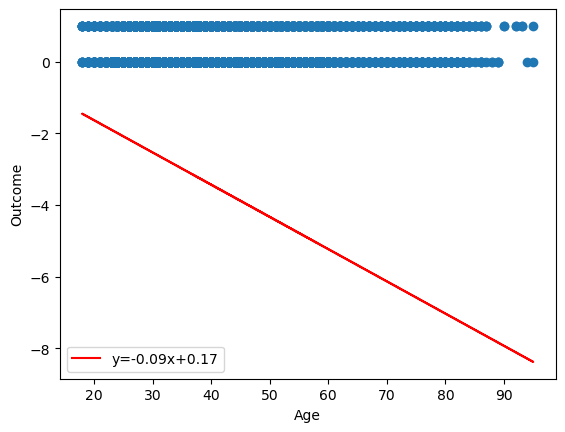

In [43]:
# Updates the values of the dataset from "yes" to 1 and from "no" to 0
train_data_df_updated = train_data_df.replace('yes',1)
train_data_df_updated2 = train_data_df_updated.replace('no',0)
train_data_df_updated2
# Calculates pearsonr and model data
corr=st.pearsonr(train_data_df_updated2['Age'],train_data_df_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and Age is {corr}")
model=st.linregress(train_data_df_updated2['Age'],train_data_df_updated2['Outcome'])
print(f"The model details are {model}")
# Taking the values from above output
slope = -0.090
intercept = 0.167
line = slope*(train_data_df_updated2['Age'])+intercept
# Creates the graph
plt.scatter(train_data_df_updated2['Age'],train_data_df_updated2['Outcome'])
plt.plot(train_data_df_updated2['Age'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Age')
plt.ylabel('Outcome')

# Save the Figure
plt.savefig("Images/Correlation_Age")

plt.legend()
plt.show()

## Analysis:
For the Age we found it had very few outliers 303. We have used age as a valid factor to judge if it has influence on the 
outcome. The r value between age and out come is 0.025. 
so we concluded that age did not have enough influence on the outcome.

In [49]:
# remove_outlier(outcome_yes_in, Balance):

q1 = outcome_yes['Balance']
q1 = outcome_yes['Balance'].quantile(0.25)
q3 = outcome_yes['Balance'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out_balance = outcome_yes.loc[(outcome_yes['Balance'] > fence_low) & (outcome_yes['Balance'] < fence_high)]
print (iqr)
df_out_balance

1949.0


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
83,59,admin.,married,secondary,yes,no,2343,yes
86,56,admin.,married,secondary,no,no,45,yes
87,41,technician,married,secondary,yes,no,1270,yes
129,55,services,married,secondary,yes,no,2476,yes
168,54,admin.,married,tertiary,no,no,184,yes
...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,no,113,yes
45204,73,retired,married,secondary,no,no,2850,yes
45205,25,technician,single,secondary,no,yes,505,yes
45206,51,technician,married,tertiary,no,no,825,yes


In [50]:
# remove_outlier(outcome_no_in, Balance):

q1 = outcome_no['Balance']
q1 = outcome_no['Balance'].quantile(0.25)
q3 = outcome_no['Balance'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_outcome_no = outcome_no.loc[(outcome_no['Balance'] > fence_low) & (outcome_no['Balance'] < fence_high)]
print (iqr)
df_outcome_no

1282.0


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category,Balance Category
0,58,management,married,tertiary,yes,no,2143,no,Adult,\$2000-$10000
1,44,technician,single,secondary,yes,no,29,no,Adult,<\$500
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth,<\$500
5,35,management,married,tertiary,yes,no,231,no,Youth,<\$500
6,28,management,single,tertiary,yes,yes,447,no,Youth,<\$500
...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,yes,yes,138,no,Adult,<\$500
45198,37,management,married,tertiary,no,no,1428,no,Adult,\$500-$2000
45199,34,blue-collar,single,secondary,yes,no,1475,no,Youth,\$500-$2000
45209,57,blue-collar,married,secondary,no,no,668,no,Adult,\$500-$2000


The correlation between customers purchasing a term deposit and Yearly_Balance  PearsonRResult(statistic=0.05138622847562193, pvalue=1.1796847529287694e-26)
The model details are LinregressResult(slope=5.414170974677023e-06, intercept=0.10891475242259137, rvalue=0.05138622847562198, pvalue=1.1796847528848868e-26, stderr=5.063076014850891e-07, intercept_stderr=0.0016859032197129762)


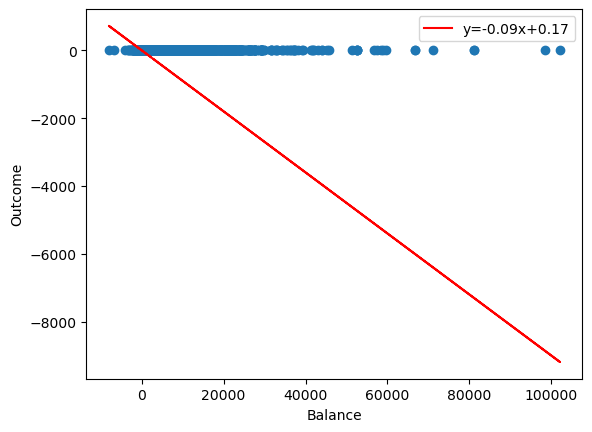

In [52]:
# Updates the values of the dataset from "yes" to 1 and from "no" to 0

train_data_clean_updated = train_data_clean.replace('yes',1)
train_data_clean_updated2 = train_data_clean_updated.replace('no',0)
train_data_clean_updated2

# Calculates pearsonr and model data
corr=st.pearsonr(train_data_clean_updated2['Balance'],train_data_clean_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and Yearly_Balance  {corr}")
model=st.linregress(train_data_clean_updated2['Balance'],train_data_clean_updated2['Outcome'])
print(f"The model details are {model}")

# Taking the values from above output
slope = -0.090
intercept = 0.167
line = slope*(train_data_clean_updated2['Balance'])+intercept

# Creates the graph
plt.scatter(train_data_clean_updated2['Balance'],train_data_clean_updated2['Outcome'])
plt.plot(train_data_clean_updated2['Balance'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Balance')
plt.ylabel('Outcome')

# Save the Figure
plt.savefig("Images/Correlation_YearlyBalance")

plt.legend()
plt.show()

## Analysis:
For the Yearly Balance we found it had very few outliers. We have used Yearly Balance as a valid factor to judge if it has 
influence on the outcome. The r value between Balance and out come is 0.051. 
so we concluded that Yearly Balance did not have enough influence on the outcome.

In [53]:
# null hypothesis = there is no correlation between types of job and the decision to select term deposit
# alternate hypothesis= there is some correlation between the type of jpb and the descision to select the term deposit


contingency_table=pd.crosstab(train_data_df['Job'], train_data_df['Outcome'])
contingency_table

Outcome,no,yes
Job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [54]:
stats.chi2_contingency(contingency_table)
# https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

Chi2ContingencyResult(statistic=836.1054877471965, pvalue=3.337121944935502e-172, dof=11, expected_freq=array([[4566.0715755 ,  604.9284245 ],
       [8593.5038818 , 1138.4961182 ],
       [1313.04359559,  173.95640441],
       [1094.93884232,  145.06115768],
       [8351.55771825, 1106.44228175],
       [1999.14640242,  264.85359758],
       [1394.28099356,  184.71900644],
       [3668.04512176,  485.95487824],
       [ 828.2682533 ,  109.7317467 ],
       [6708.26643958,  888.73356042],
       [1150.56879963,  152.43120037],
       [ 254.30837628,   33.69162372]]))

## Analysis:
    
1.Null hypothesis = there is no correlation between types of job and the decision to select 
term deposit Alternate hypothesis= there is some correlation between the type of Job and the decision to 
select the term deposit

2.On the basis of the chi square test of independence inn this case since p value>0.05 
we can make an assumption that there isn't enough evidence supporting the hypothesis that jobs 
have effect on the purchasing of term deposit and so we will accept the null hypothesis

In [55]:
# null hypothesis = there is no correlation between types of Marital_Status and the decision to select term deposit
# alternate hypothesis= there is some correlation between the type of Marital_Status and the 
#descision to select the term deposit

contingency_table = pd.crosstab(train_data_clean['Marital_Status'],train_data_clean['Outcome'])
contingency_table

Outcome,no,yes
Marital_Status,,
divorced,4430,598
married,23343,2603
single,10399,1820


In [56]:
# https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

st.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=191.58127409263932, pvalue=2.5041187079195114e-42, dof=2, expected_freq=array([[ 4443.51668094,   584.48331906],
       [22929.88938022,  3016.11061978],
       [10798.59393883,  1420.40606117]]))

## Analysis:

1.Null hypothesis = there is no correlation between types of Marital_Status and the decision to select term deposit
Alternate hypothesis= there is some correlation between the type of Marital_Status and thedescision to select the term deposit

2.Using the chi square test of independence in this case since p value>0.05 we can make an assumption that 
there isnt enough evidence supporting the hypothesis that Marital Status have effect on 
the purchasing of term deposit and so we will accept the null hypothesis
